## Assignment 9: Exercise 2

In [2]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:10000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Na    = 2
Rf    = 0.02 
mu    = np.array([0.05,0.15]).reshape((Na,1))
sigma = np.array([0.15,0.25]).reshape((Na,1))
b     = np.array([0.03,0.03]).reshape((Na,1))
rho   = 0.5
gamma = 1

mcov = np.array([sigma[0]**2,rho*sigma[0]*sigma[1],rho*sigma[0]*sigma[1],sigma[1]**2]).reshape((Na,Na))


# (a)

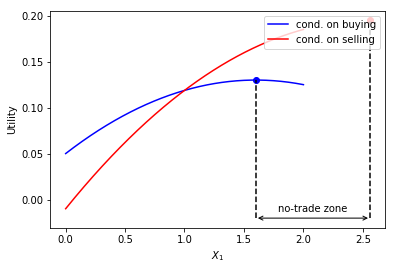

In [2]:
def U_1asset(X0,X1,gamma,Rf,mu,sigma,b,id_asset,a): 
    U = Rf+X1*(mu[id_asset]-Rf)-0.5*gamma*sigma[id_asset]**2*X1**2-(X1-X0)*b[id_asset]*a
    return U
    
def X1_1asset(X0,gamma,mu,sigma,b,id_asset,a): 
    X1_o = (mu[id_asset]-Rf-b[id_asset]*a)/(gamma*sigma[id_asset]**2)
    U_o  = U_1asset(X0,X1_o,gamma,Rf,mu,sigma,b,id_asset,a)
    return X1_o,U_o

Np       = 1000
X0       = 1
X1_grd   = np.linspace(0.001,2,Np)
Ub_grd   = np.empty((Np,1))
Us_grd   = np.empty((Np,1))
id_asset = 1 
for i in range(Np): 
    Ub_grd[i] = U_1asset(X0,X1_grd[i],gamma,Rf,mu,sigma,b,id_asset,1)
    Us_grd[i] = U_1asset(X0,X1_grd[i],gamma,Rf,mu,sigma,b,id_asset,-1)

X1_ob,U_ob = X1_1asset(X0,gamma,mu,sigma,b,id_asset,1)
X1_os,U_os = X1_1asset(X0,gamma,mu,sigma,b,id_asset,-1)
    
plt.plot(X1_grd,Ub_grd,'b-',label='cond. on buying')
plt.plot(X1_ob,U_ob,'bo')
plt.plot(X1_grd,Us_grd,'r-',label='cond. on selling')
plt.plot(X1_os,U_os,'ro')
axes = plt.gca()
ymin, ymax = axes.get_ylim()
plt.plot([X1_ob,X1_ob],[ymin,U_ob],'k--')
plt.plot([X1_os,X1_os],[ymin,U_os],'k--')
plt.xlabel('$X_1$')
plt.ylabel('Utility')
plt.legend(loc="upper right")
plt.annotate(s='', xy=(X1_ob,ymin), xytext=(X1_os,ymin), arrowprops=dict(arrowstyle='<->'))
axes.annotate('no-trade zone', xy=((X1_ob+X1_os)/2,ymin+0.005), xytext=((X1_ob+X1_os)/2,ymin+0.005), ha="center", va="bottom")
plt.show()


# (b)

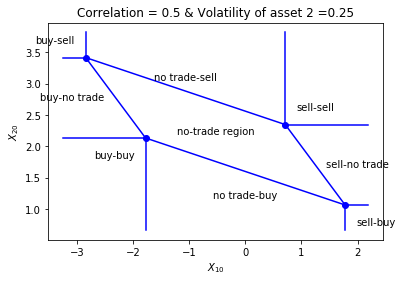

In [3]:
def U_2asset(X0,X1,gamma,Rf,mu,mcov,b,a): 
    U = Rf+X1.T@(mu-Rf)-0.5*gamma*(X1.T@(mcov@X1))-(X1-X0).T@np.multiply(b,a)
    return U

def X1_2T(X0,gamma,mu,mcov,b,a): 
    invcov = np.linalg.inv(mcov)
    X1_o = (invcov@(mu-Rf-np.multiply(b,a)))/gamma
    return X1_o

def X1_1T(X0_NT,gamma,mu,mcov,b,idx_T,a): 
    X1_T = (mu[idx_T]-Rf-b[idx_T]*a-mcov[0][1]*X0_NT)/(gamma*mcov[idx_T][idx_T])
    return X1_T

def trade_regions(X0,gamma,mu,rho,sigma,b): 
    Na = len(mu)
    mcov = np.array([sigma[0]**2,rho*sigma[0]*sigma[1],rho*sigma[0]*sigma[1],sigma[1]**2]).reshape((Na,Na))

    X1_bb = X1_2T(X0,gamma,mu,mcov,b,np.array([1,1]).reshape(Na,1))
    X1_bs = X1_2T(X0,gamma,mu,mcov,b,np.array([1,-1]).reshape(Na,1))
    X1_sb = X1_2T(X0,gamma,mu,mcov,b,np.array([-1,1]).reshape(Na,1))
    X1_ss = X1_2T(X0,gamma,mu,mcov,b,np.array([-1,-1]).reshape(Na,1))

    Delta = 0.4
    xmin = X1_bs[0]-Delta
    xmax = X1_sb[0]+Delta
    ymin = X1_sb[1]-Delta
    ymax = X1_bs[1]+Delta

    Np = 100
    BB1_x = np.linspace(xmin,X1_bb[0],Np)
    BB1_y = X1_bb[1]*np.ones((Np,1))
    BB2_x = X1_bb[0]*np.ones((Np,1))
    BB2_y = np.linspace(ymin,X1_bb[1],Np)

    SS1_x = np.linspace(X1_ss[0],xmax,Np)
    SS1_y = X1_ss[1]*np.ones((Np,1))
    SS2_x = X1_ss[0]*np.ones((Np,1))
    SS2_y = np.linspace(X1_ss[1],ymax,Np)

    BS1_x = np.linspace(xmin,X1_bs[0],Np)
    BS1_y = X1_bs[1]*np.ones((Np,1))
    BS2_x = X1_bs[0]*np.ones((Np,1))
    BS2_y = np.linspace(X1_bs[1],ymax,Np)

    SB1_x = np.linspace(X1_sb[0],xmax,Np)
    SB1_y = X1_sb[1]*np.ones((Np,1))

    SB2_x = X1_sb[0]*np.ones((Np,1))
    SB2_y = np.linspace(ymin,X1_sb[1],Np)

    NS_x = np.linspace(X1_bs[0],X1_ss[0],Np).reshape((Np,1))
    NS_y = np.empty((Np,1))
    for i in range(Np): NS_y[i] = X1_1T(NS_x[i],gamma,mu,mcov,b,1,-1)

    NB_x = np.linspace(X1_bb[0],X1_sb[0],Np).reshape((Np,1))
    NB_y = np.empty((Np,1))
    for i in range(Np): NB_y[i] = X1_1T(NB_x[i],gamma,mu,mcov,b,1,1)

    BN_x = np.empty((Np,1))
    BN_y = np.linspace(X1_bs[1],X1_bb[1],Np).reshape((Np,1))
    for i in range(Np): BN_x[i] = X1_1T(BN_y[i],gamma,mu,mcov,b,0,1)

    SN_x = np.empty((Np,1))
    SN_y = np.linspace(X1_ss[1],X1_sb[1],Np).reshape((Np,1))
    for i in range(Np): SN_x[i] = X1_1T(SN_y[i],gamma,mu,mcov,b,0,-1)

    plt.plot(X1_bb[0],X1_bb[1],'bo')
    plt.plot(X1_bs[0],X1_bs[1],'bo')
    plt.plot(X1_sb[0],X1_sb[1],'bo')
    plt.plot(X1_ss[0],X1_ss[1],'bo')
    plt.plot(BB1_x,BB1_y,'b-')
    plt.plot(BB2_x,BB2_y,'b-')
    plt.plot(SS1_x,SS1_y,'b-')
    plt.plot(SS2_x,SS2_y,'b-')
    plt.plot(BS1_x,BS1_y,'b-')
    plt.plot(BS2_x,BS2_y,'b-')
    plt.plot(SB1_x,SB1_y,'b-')
    plt.plot(SB2_x,SB2_y,'b-')
    plt.plot(NS_x,NS_y,'b-')
    plt.plot(NB_x,NB_y,'b-')
    plt.plot(BN_x,BN_y,'b-')
    plt.plot(SN_x,SN_y,'b-')
    plt.xlabel('$X_{10}$')
    plt.ylabel('$X_{20}$')
    axes = plt.gca()
    loc = (X1_bb[0]-0.2,X1_bb[1]-0.2)
    axes.annotate('buy-buy', 
                  xy=loc, 
                  xytext=loc, ha="right", va="top")
    loc = (X1_ss[0]+0.2,X1_ss[1]+0.2)
    axes.annotate('sell-sell', 
                  xy=loc, xytext=loc, ha="left", va="bottom")
    loc = (X1_bs[0]-0.2,X1_bs[1]+0.2)
    axes.annotate('buy-sell', xy=loc, xytext=loc, ha="right", va="bottom")
    loc = (X1_sb[0]+0.2,X1_sb[1]-0.2)
    axes.annotate('sell-buy', 
                  xy=loc, xytext=loc, ha="left", va="top")
    loc = ((X1_bs[0]+X1_ss[0])/2,(X1_bs[1]+X1_ss[1])/2+0.3)
    axes.annotate('no trade-sell', 
                  xy=loc, xytext=loc, ha="center", va="top")
    loc = ((X1_bb[0]+X1_sb[0])/2,(X1_bb[1]+X1_sb[1])/2-0.3)
    axes.annotate('no trade-buy', xy=loc, xytext=loc, ha="center", va="top")
    loc = ((X1_bb[0]+X1_bs[0])/2-0.2,(X1_bb[1]+X1_bs[1])/2)
    axes.annotate('buy-no trade', xy=loc, xytext=loc, ha="right", va="center")
    loc = ((X1_sb[0]+X1_ss[0])/2+0.2,(X1_sb[1]+X1_ss[1])/2)
    axes.annotate('sell-no trade', 
                  xy=loc, xytext=loc, ha="left", va="center")
    loc = ((X1_bb[0]+X1_ss[0]+X1_sb[0]+X1_bs[0])/4,(X1_bb[1]+X1_ss[1]+X1_sb[1]+X1_bs[1])/4)
    axes.annotate('no-trade region', xy=loc, xytext=loc, ha="center", va="center")
    str_title = 'Correlation = '+str(rho)+' & '+'Volatility of asset 2 ='+np.array_str(sigma[1]).replace("[","")
    str_title = str_title.replace("]","")
    plt.title(str_title)
    plt.show()

    
trade_regions(X0,gamma,mu,rho,sigma,b)


# (c)

Impact of correlation: 


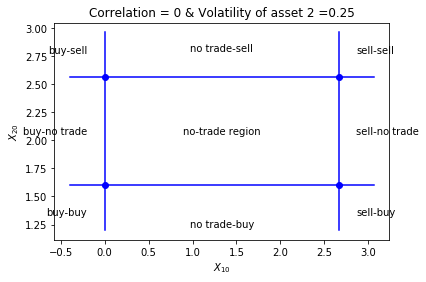

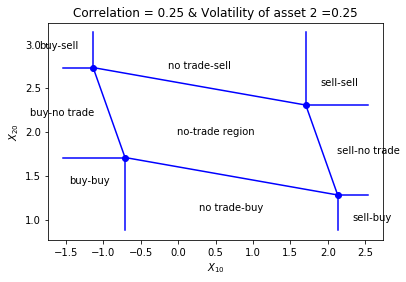

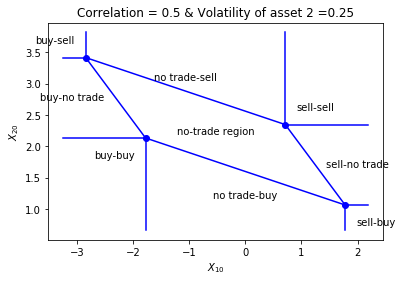

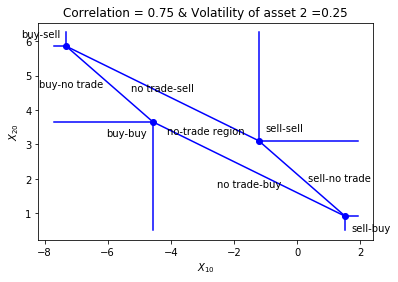

In [7]:
#Impact of correlation
print('Impact of correlation: ')
trade_regions(X0,gamma,mu,0,sigma,b)
trade_regions(X0,gamma,mu,0.25,sigma,b)
trade_regions(X0,gamma,mu,0.5,sigma,b)
trade_regions(X0,gamma,mu,0.75,sigma,b)


Impact of volatility of asset 2: 


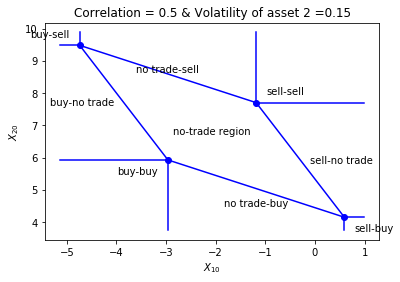

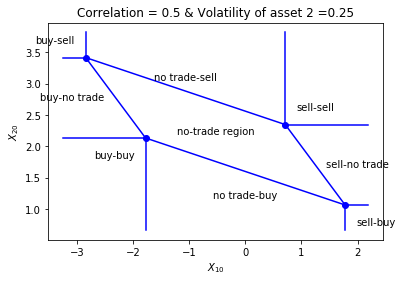

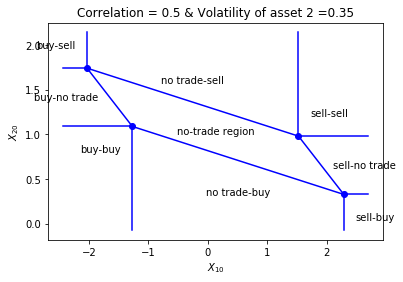

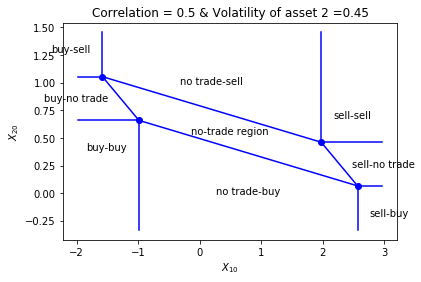

In [8]:
# Impact of volatility
print('Impact of volatility of asset 2: ')
sigma_ = np.copy(sigma)
sigma_[1] = 0.15
trade_regions(X0,gamma,mu,rho,sigma_,b)
sigma_[1] = 0.25
trade_regions(X0,gamma,mu,rho,sigma_,b)
sigma_[1] = 0.35
trade_regions(X0,gamma,mu,rho,sigma_,b)
sigma_[1] = 0.45
trade_regions(X0,gamma,mu,rho,sigma_,b)
